# ARIMA = Auto Regression Integrated Moving Average

In [168]:
import numpy as np 
import pandas as pd 

In [169]:
df = pd.read_csv('shampoo.csv', header=0, parse_dates=[0])
df.head(10)

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


In [170]:
df.dtypes

Month     object
Sales    float64
dtype: object

<Axes: >

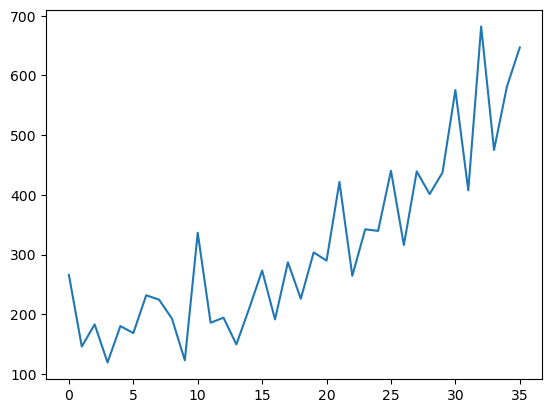

In [171]:
df['Sales'].plot()

# The above trend is polynomial.
D = 2

# Autocorrelation Plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

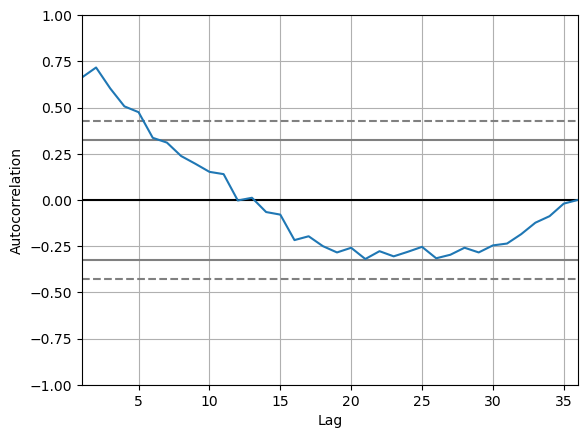

In [172]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])

q = 5
because the confidence interval line crosses the line after 5

# Partial Autocorrelation Graph

In [173]:
from statsmodels.graphics.tsaplots import plot_pacf

c:\Users\shahd\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


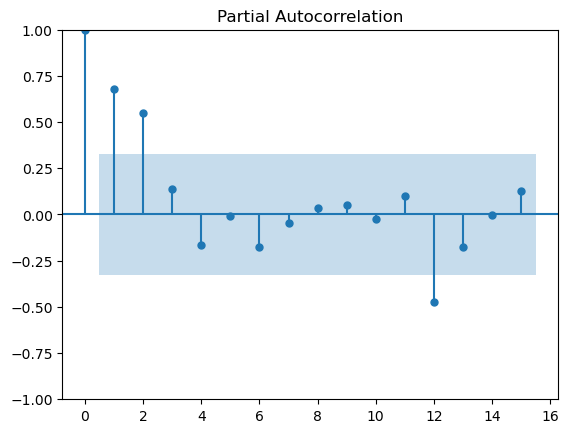

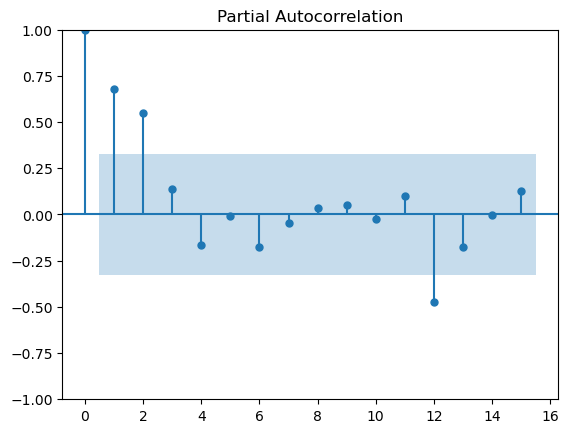

In [174]:
plot_pacf(df['Sales'], lags=15)

# The above graph is crossing confidence interval at 2 so p=2

# #NOTES:
- simple Y variable plot we get D = No. of differencing needed
- Autocorrelation of Y variable we get q = No. of lag variables
- Partial Autocorrelation of Y we get p = Window size for Moving Average (MA)

# Now training model

In [175]:
from statsmodels.tsa.arima.model import ARIMA

In [176]:
model = ARIMA(df['Sales'], order=(2,2,5)) # p,d,q

In [177]:
model_fit = model.fit()

c:\Users\shahd\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [178]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(2, 2, 5)   Log Likelihood                -189.635
Date:                Fri, 15 Mar 2024   AIC                            395.269
Time:                        22:37:50   BIC                            407.480
Sample:                             0   HQIC                           399.434
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.9079      0.246     -7.741      0.000      -2.391      -1.425
ar.L2         -0.9544      0.219     -4.363      0.000      -1.383      -0.526
ma.L1         -0.0681     19.816     -0.003      0.997     -38.907      38.771
ma.L2         -1.8461      2.769     -0.667      0.505      -7.273       3.581
ma.L3          0.3024     19.763      0.015      0.988     -38.431      39.036
ma.L4          0.9883      2.801      0.353      0.724      -4.501       6.478
ma.L5         -0.1280      0.339     -0.377      0.706      -0.793       0.537
sigma2      2696.5492      0.014   1.95e+05      0.000    2696.522    2696.576
===================================================================================
Ljung-Box (L1) (Q):                   0.73   Jarque-Bera (JB):                 0.18
Prob(Q):                              0.39   Prob(JB):                         0.92
Heteroskedasticity (H):               0.94   Skew:                            -0.01
Prob(H) (two-sided):                  0.92   Kurtosis:                         2.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.47e+22. Standard errors may be unstable.
"""

# How to understand above results:
- We have 2 AR variables that is called p = finds no of lag variables
- We have 5 MA variables that is called q = window size for MA
- smallerthe p value then important is that co-efficient that is L1 and L2.

# Residuals:

<Axes: >

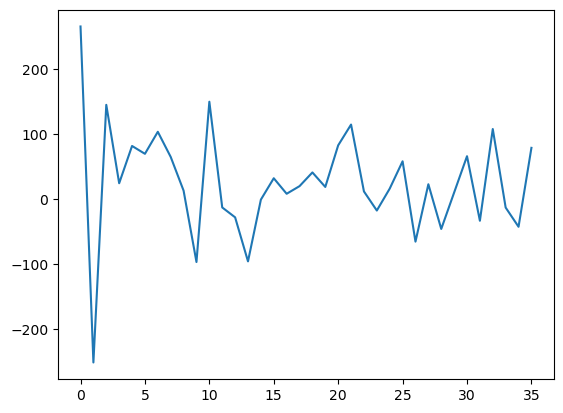

In [179]:
residuals = model_fit.resid
residuals.plot()

# There is no trend or seasonality and thus acting as white noise now we know that 
- series should not have white noise;
- residuals/errors should be white noise;

In [180]:
residuals.describe()


count     36.000000
mean      25.165155
std       86.508605
min     -251.672256
25%      -14.150827
50%       19.384055
75%       72.116637
max      266.000000
dtype: float64

# Variations of ARIMA Model :
- ARIMA

model = ARIMA(df['Sales'], order=(q,d,p))
- Autoregression 

model = ARIMA(df['Sales'], order=(q,d,0))
- Moving Average Model

model = ARIMA(df['Sales'], order=(q,d,0))

In [181]:
output = model_fit.forecast()

In [182]:
output

36    656.794036
dtype: float64

In [183]:
model_fit.forecast(5)

36    656.794036
37    637.267809
38    712.226614
39    710.394096
40    755.776439
Name: predicted_mean, dtype: float64

# Walk forward Validation:

In [184]:
from pandas import datetime
from math import sqrt

C:\Users\shahd\AppData\Local\Temp\ipykernel_20252\2289434345.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [185]:
# load dataset
def parser(x):
 return datetime.strptime('190'+x, '%Y-%m')
series = pd.read_csv('shampoo.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series.index = series.index.to_period('M')

C:\Users\shahd\AppData\Local\Temp\ipykernel_20252\1423229178.py:4: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv('shampoo.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)


In [186]:
series.head(10)

Month
1901-01    266.0
1901-02    145.9
1901-03    183.1
1901-04    119.3
1901-05    180.3
1901-06    168.5
1901-07    231.8
1901-08    224.5
1901-09    192.8
1901-10    122.9
Freq: M, Name: Sales, dtype: float64

In [190]:
# split into train and test sets
X = series.values
train_size = int(len(X) * 0.7)
train, test = X[0:train_size], X[train_size:len(X)]

In [191]:
# walk-forward validation
data = [x for x in train]
predictions = list()
for t in range(len(test)):
 model = ARIMA(data, order=(5,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 data.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))

predicted=368.668956, expected=440.400000
predicted=335.044741, expected=315.900000
predicted=363.220222, expected=439.300000
predicted=357.645324, expected=401.300000
predicted=443.047835, expected=437.400000
predicted=378.365674, expected=575.500000
predicted=459.415021, expected=407.600000
predicted=526.890876, expected=682.000000
predicted=457.231274, expected=475.300000
predicted=672.914943, expected=581.300000
predicted=531.541449, expected=646.900000


In [189]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % mse)
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test MSE: 9170.052
Test RMSE: 95.760


# Visualization:

In [192]:
import matplotlib.pyplot as plt

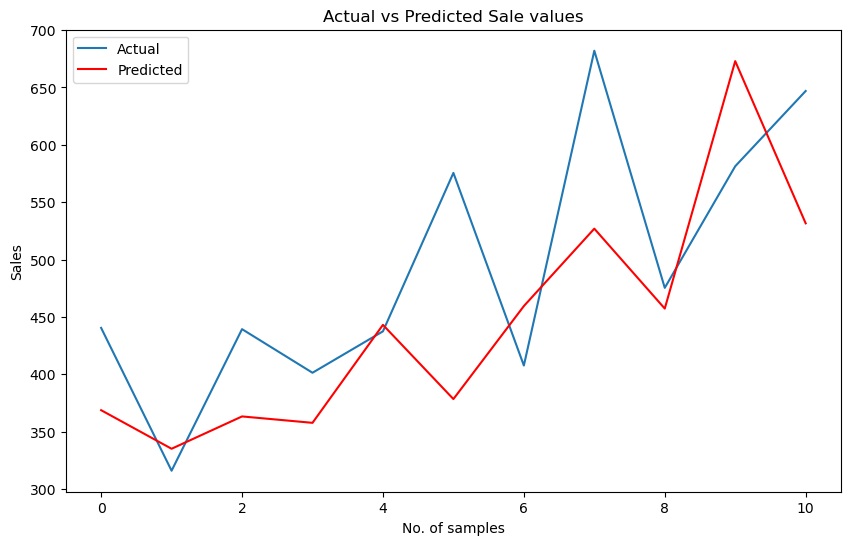

In [195]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(test, label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('No. of samples')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sale values')
plt.legend()
plt.show()

# #NOTES:
A trend is the presence of a long-term increase or decrease in the sequence. Seasonality is a variation that occurs at specific regular intervals of less than a year. Seasonality can occur on different time spans such as daily, weekly, monthly, or yearly.